In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
import numpy as np

In [2]:

tree = ET.parse('Investment Adviser Representatives Report/IA_Indvl_Feeds1.xml')
root = tree.getroot()

In [3]:
info = []
drp = []
for Indvl in root.find('Indvls'):
    #print(Indvl.find('Info').attrib)
    info.append(Indvl.find('Info').attrib)
    index = 0
    if Indvl.find('DRPs'):
        for DRP in Indvl.find('DRPs'):
            #drp.append(DRPs.find('DRP').attrib)
            drp.append(DRP.attrib)
    else:
        drp.append({'hasRegAction': np.nan,
                      'hasCriminal': np.nan,
                      'hasBankrupt': np.nan,
                      'hasCivilJudc': np.nan,
                      'hasBond': np.nan,
                      'hasJudgment': np.nan,
                      'hasInvstgn': np.nan,
                      'hasCustComp': np.nan,
                      'hasTermination': np.nan})

In [4]:
pd.DataFrame(info).shape

(17687, 7)

In [5]:
pd.DataFrame(drp).shape

(17687, 9)

In [6]:
data = pd.concat([pd.DataFrame(info),pd.DataFrame(drp)],axis=1)
print(data)

      actvAGReg      firstNm  indvlPK            lastNm  \
0             Y     JONATHAN  2688305            POTTER   
1             Y         ALAN  2793573            DAWSON   
2             Y         PAUL  2873183           DESMOND   
3             Y       DEANNA  2858140             PERRY   
4             Y       Ernest  2764017          Martinez   
5             Y     LORRAINE  2699651             CRAIG   
6             Y       Rizwan  2865966           Mahmood   
7             N      BRENTON  2825608             FEWOX   
8             Y       ROBERT  2783907             LAIRD   
9             Y        DAVID  2769750           KINNEAR   
10            Y      WILLIAM  2723868           UNKRAUT   
11            Y      REBECCA  2833377          MORELAND   
12            Y         ERIK  2839461          ALLSTATT   
13            Y       CALVIN  2663242       SENDAYDIEGO   
14            N        JANET  2705363           JOHNSON   
15            Y        CONAL  2865852   SATURNO-SANJANA 

In [7]:
data = data[pd.notnull(data['hasCriminal'])]
print(data.head())
print(data.shape)

  actvAGReg   firstNm  indvlPK    lastNm  \
0         Y  JONATHAN  2688305    POTTER   
2         Y      PAUL  2873183   DESMOND   
4         Y    Ernest  2764017  Martinez   
7         N   BRENTON  2825608     FEWOX   
9         Y     DAVID  2769750   KINNEAR   

                                                link    midNm sufNm  \
0  http://www.adviserinfo.sec.gov/IAPD/Individual...   HAWKES   NaN   
2  http://www.adviserinfo.sec.gov/IAPD/Individual...   ANDREW   NaN   
4  http://www.adviserinfo.sec.gov/IAPD/Individual...        J   NaN   
7  http://www.adviserinfo.sec.gov/IAPD/Individual...      LEE   NaN   
9  http://www.adviserinfo.sec.gov/IAPD/Individual...  STEPHEN   NaN   

  hasBankrupt hasBond hasCivilJudc hasCriminal hasCustComp hasInvstgn  \
0           N       N            N           N           Y          N   
2           N       N            N           N           Y          N   
4           N       N            N           N           Y          N   
7           N   

In [8]:
data_2 = data.loc[:, 'hasBankrupt':'hasTermination']
data_2['actvAGReg'] = data['actvAGReg']
print(data_2.head())

  hasBankrupt hasBond hasCivilJudc hasCriminal hasCustComp hasInvstgn  \
0           N       N            N           N           Y          N   
2           N       N            N           N           Y          N   
4           N       N            N           N           Y          N   
7           N       N            N           N           N          N   
9           N       N            N           N           N          N   

  hasJudgment hasRegAction hasTermination actvAGReg  
0           N            N              N         Y  
2           N            N              N         Y  
4           N            N              N         Y  
7           N            N              Y         N  
9           N            Y              N         Y  


C:\Users\pazzu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
data_2 = data_2.replace(['Y','N'], [1, 0])
print(data_2.head())

   hasBankrupt  hasBond  hasCivilJudc  hasCriminal  hasCustComp  hasInvstgn  \
0            0        0             0            0            1           0   
2            0        0             0            0            1           0   
4            0        0             0            0            1           0   
7            0        0             0            0            0           0   
9            0        0             0            0            0           0   

   hasJudgment  hasRegAction  hasTermination  actvAGReg  
0            0             0               0          1  
2            0             0               0          1  
4            0             0               0          1  
7            0             0               1          0  
9            0             1               0          1  


In [10]:
from sklearn.manifold import TSNE

import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.DEBUG)

data_2 = data_2[:1000]

hasCriminal = data_2.hasCriminal
hasBankrupt = data_2.hasBankrupt

X_embedded = TSNE(n_components=2).fit_transform(data_2)
X_embedded.shape

(1000, 2)

In [11]:
print(data_2.corr())

                hasBankrupt  hasBond  hasCivilJudc  hasCriminal  hasCustComp  \
hasBankrupt        1.000000      NaN           NaN    -0.098810    -0.517108   
hasBond                 NaN      NaN           NaN          NaN          NaN   
hasCivilJudc            NaN      NaN           NaN          NaN          NaN   
hasCriminal       -0.098810      NaN           NaN     1.000000    -0.292112   
hasCustComp       -0.517108      NaN           NaN    -0.292112     1.000000   
hasInvstgn        -0.018732      NaN           NaN    -0.012839     0.026121   
hasJudgment       -0.012628      NaN           NaN    -0.032498    -0.234778   
hasRegAction      -0.054677      NaN           NaN    -0.030641    -0.233501   
hasTermination    -0.044738      NaN           NaN    -0.001389    -0.128471   
actvAGReg         -0.030941      NaN           NaN    -0.054826     0.137530   

                hasInvstgn  hasJudgment  hasRegAction  hasTermination  \
hasBankrupt      -0.018732    -0.012628     -0

DEBUG:matplotlib:CACHEDIR=C:\Users\pazzu\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\pazzu\.matplotlib\fontList.json
DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown
DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\Users\\pazzu\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000


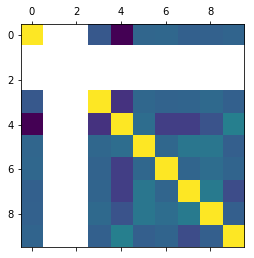

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


In [12]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.matshow(data_2.corr())
plt.show()

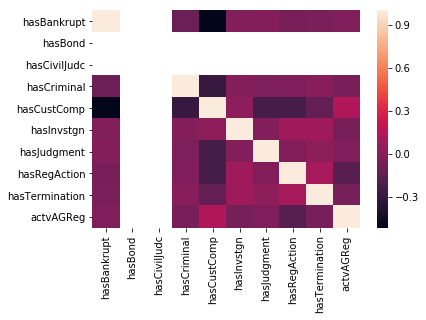

In [13]:
import seaborn as sns
corr = data_2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [14]:
import bokeh.plotting as bp
from bokeh.plotting import save, curdoc
from bokeh.models import HoverTool
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook

colormap = np.array([
"#1f77b4", "#ff7f0e", "#aec7e8", "#ffbb78", "#2ca02c",
"#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
"#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
"#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5"
])

print(colormap[hasCriminal])
# fill_colors = colormap[hasCriminal]

# X_embedded = X_embedded[:1000]
print(X_embedded.shape)
title = "plot"



def make_dataset():
    
    x_values = X_embedded[:,0]
    y_values = X_embedded[:,1]
    fill_colors = colormap[hasCriminal]
#     contents = news_df_copy['TITLE']
#     topic_keys = news_df_copy['topic_key']
#     dates = news_df_copy['DATETIME'].apply(lambda x: str(x))
#     topic_words = news_df_copy['topic_words']
    
    data={
        "x_values": x_values,
        "y_values": y_values,
        "fill_color": fill_colors,
#         "content": contents,
#         "topic_key": topic_keys,
#         "topic_words": topic_words,
#         "date": dates
        }
    
    return ColumnDataSource(data)

def make_plot(src):
    
    plot_lda = bp.figure(plot_width=1000, plot_height=800,
                    title=title,
                    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
                    x_axis_type=None, y_axis_type=None, min_border=1)
    
    plot_lda.scatter(x="x_values", y="y_values",
                    marker="circle",
                    size=15,
                    line_color=None,
                    fill_color="fill_color",
                    fill_alpha=0.5,
#                     legend="topic_words",
                    source=src
                    )
    return plot_lda

['#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4'
 '#ff7f0e' '#1f77b4' '#ff7f0e' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4'
 '#1f77b4' '#ff7f0e' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4'
 '#1f77b4' '#ff7f0e' '#1f77b4' '#ff7f0e' '#1f77b4' '#1f77b4' '#1f77b4'
 '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4'
 '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4'
 '#ff7f0e' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4'
 '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#ff7f0e' '#1f77b4' '#1f77b4'
 '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4'
 '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4'
 '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4'
 '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#ff7f0e' '#1f77b4' '#1f77b4'
 '#1f77b4' '#ff7f0e' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4'
 '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#1f77b4' '#ff7f0e' '#1f77b4'
 '#1f7

In [15]:
output_notebook

<function bokeh.io.output.output_notebook(resources=None, verbose=False, hide_banner=False, load_timeout=5000, notebook_type='jupyter')>

In [16]:
src = make_dataset()
plot_lda = make_plot(src)
bp.show(plot_lda)